## **Importing Required Libraries**

We import all the necessary libraries that will be used throughout our machine learning project. Each library has a specific purpose that helps in data handling, visualization, modeling, and evaluation.

- **NumPy**:  
  Used for numerical operations. It handles arrays, mathematical functions, and linear algebra efficiently.

- **Pandas**:  
  Essential for data manipulation and analysis. It helps us read, filter, and structure our dataset using DataFrames.

- **Matplotlib**:  
  Used for creating basic visualizations such as line charts, bar graphs, and histograms.

- **Seaborn**:  
  A statistical data visualization library built on top of Matplotlib. It provides beautiful and informative graphics.

- **Scikit-learn**:  
  The core machine learning library for Python. It provides tools for:
  - Preprocessing (e.g. scaling, train-test split)
  - Building models (e.g. logistic regression, decision trees)
  - Evaluating models (e.g. accuracy, confusion matrix)


- **Pickle**:

  We use the `pickle` library to save the trained ML model into a `.pkl` file.
This allows us to reuse the model without retraining.


- Avoids retraining
- Good for deployment
- Makes model portable




In [2]:
# Numerical and data manipulation 
import numpy as np
import pandas as pd

# Visualization libraries 
import matplotlib.pyplot as plt
import seaborn as sns 

# Machine learning tools from sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# For save the model
import pickle


## **Data Loading and Exploration with Classes**

We are creating a single class `dataloader` which:
- Loads the CSV file into a Pandas DataFrame
- Automatically prints the following information upon method calls:
  

  - `head_data()` ➝ Returns the top rows
  - `tail_data()` ➝ Returns the bottom rows
  - `sample_data()` ➝ Returns a random sample of the data
  - `describe_data()` ➝ Shows statistical summary
  - `info_data()` ➝ Shows data types and nulls


In [3]:
pd.set_option("display.width",1000)

class dataloader:

    def __init__(self, file_path):
        """
        Initializes the ppl_data with file path
        Loads data into self.df
        """
        self.file_path = file_path
        self.df = None 
    def load_data(self):
        try:
            self.df = pd.read_csv(self.file_path)
            return "Data loaded successfully"
        except Exception as e:
            return f"Error loading data : {e} "
        
    def show_head(self):
        print("\nHead of the dataset:")
        return self.df.head()

    def show_tail(self):
        print("\nTail of the dataset:")
        return self.df.tail()
         
    def show_sample(self):
        print("\nRandom Sample of the Dataset :")
        return self.df.sample()

    def show_description(self):
        print("\nStatistical summary:")
        return self.df.describe()
        
    def show_info(self):
        print("/nDataset information :")
        return self.df.info()



In [4]:
"""Initialize DataLoader Object with CSV File"""
loader = dataloader("people_data.csv")
loader.load_data()


'Data loaded successfully'

In [5]:
loader.show_head()


Head of the dataset:


,ID,Age,Weight,Height,SystolicBP,DiastolicBP,HeartRate,Temperature,DiseaseOutcome
0,1,25,68.5,172.2,120,80,75,98.6,0
1,2,30,75.0,180.5,130,85,80,99.1,0
2,3,22,60.2,165.3,110,70,65,97.9,0
3,4,28,82.1,178.0,140,90,85,100.2,1
4,5,35,90.0,185.4,135,88,82,99.4,1


In [6]:
loader.show_tail()


Tail of the dataset:


,ID,Age,Weight,Height,SystolicBP,DiastolicBP,HeartRate,Temperature,DiseaseOutcome
59,60,30,55.9,160.4,113,95,88,99.6,1
60,61,43,76.0,188.3,116,73,74,100.7,1
61,62,55,71.0,176.9,135,90,60,100.4,1
62,63,59,56.9,171.6,149,74,84,98.8,1
63,64,43,94.0,160.5,139,67,66,97.4,1


In [7]:
loader.show_description()


Statistical summary:


,ID,Age,Weight,Height,SystolicBP,DiastolicBP,HeartRate,Temperature,DiseaseOutcome
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,32.500000,35.812500,75.868750,175.871875,130.156250,80.484375,78.265625,98.985938,0.671875
std,18.618987,10.375299,13.261723,9.628685,13.030147,8.543060,8.136225,0.892094,0.473242
min,1.000000,21.000000,55.000000,160.400000,101.000000,61.000000,60.000000,97.100000,0.000000
25%,16.750000,27.000000,64.650000,167.225000,119.750000,74.750000,73.750000,98.300000,0.000000
50%,32.500000,35.000000,74.500000,174.650000,130.500000,80.000000,80.000000,98.900000,1.000000
75%,48.250000,43.250000,87.175000,182.825000,141.000000,86.250000,84.000000,99.625000,1.000000
max,64.000000,59.000000,100.000000,194.500000,150.000000,95.000000,99.000000,100.700000,1.000000


In [8]:
loader.show_info()

/nDataset information :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              64 non-null     int64  
 1   Age             64 non-null     int64  
 2   Weight          64 non-null     float64
 3   Height          64 non-null     float64
 4   SystolicBP      64 non-null     int64  
 5   DiastolicBP     64 non-null     int64  
 6   HeartRate       64 non-null     int64  
 7   Temperature     64 non-null     float64
 8   DiseaseOutcome  64 non-null     int64  
dtypes: float64(3), int64(6)
memory usage: 4.6 KB


## **Data Cleaning and Preprocessing**

We create a new class called `DataCleaner` to handle preprocessing tasks before training a machine learning model.

### Tasks Performed:

1. **Null Value Handling**
   - We check for missing (null) values in the dataset.
   - If any are found, we decide whether to:
     - Drop them
     - Fill them with statistical values (like mean or median)

2. **Zero Value Handling**
   - In medical datasets like this, some features may have zero values which are **not valid** (e.g., 0 Systolic and Diastolic blood pressure are not realistic).
   - We treat zeros as missing values **in specific columns only**, and then replace them using:
     - **Mean or Median**, depending on the distribution of the column.

3. **Column Renaming**
   - Columns with long names are converted to **abbreviations or simpler names** to improve readability and code simplicity.
  
   - ID : "ID"
   - Age : "Age" 
   - Weight : "Weight"
   - Height : "Height"
   - SystolicBP : "SBP"
   - DiastolicBP : "DBP" 
   - HeartRate : "HR"
   - Temperature : "Temp"
   - DiseaseOutcome : "DO"



In [9]:
class DataCleaner:
    def __init__(self, dataframe):
        self.df = dataframe.copy()

    def check_nulls(self):
        print("\nChecking for null values:")
        return self.df.isnull().sum()

    def replace_zeros(self):
        print("\nHandling zero values in selected columns...")
        # Columns where zero is not a valid value 
        cols_with_invalid_zeros = ['ID', 'Height', 'Weight', 'SystolicBP', 'Temperature']

        for col in cols_with_invalid_zeros:
            zero_count = (self.df[col] == 0).sum()
            median_value = self.df[self.df[col] != 0][col].median()
            print(f"Column '{col}' with median value: {median_value}")

    def rename_columns(self):
        renamed_columns = {
                'ID': 'ID',
                'Age': 'Age', 
                'Weight': 'Weight',
                'Height': 'Height',
                'SystolicBP': 'SBP',
                'DiastolicBP': 'DBP',
                'HeartRate': 'HR',
                'Temperature': 'Temp',
                'DiseaseOutcome': 'DO'

                }

        self.df.rename(columns=renamed_columns, inplace= True)
        print("Renamed columns successfully.")

    def get_clean_data(self):
        return self.df
        

In [10]:
loader = dataloader("people_data.csv")
loader.load_data()
df = loader.df
cleaner = DataCleaner(df)
cleaner.check_nulls()



Checking for null values:


ID                0
Age               0
Weight            0
Height            0
SystolicBP        0
DiastolicBP       0
HeartRate         0
Temperature       0
DiseaseOutcome    0
dtype: int64

In [11]:
cleaner.replace_zeros()


Handling zero values in selected columns...
Column 'ID' with median value: 32.5
Column 'Height' with median value: 174.65
Column 'Weight' with median value: 74.5
Column 'SystolicBP' with median value: 130.5
Column 'Temperature' with median value: 98.9


In [12]:
cleaner.rename_columns()

Renamed columns successfully.


In [13]:
# Get the cleaned and updated dataframe
cleaned_df = cleaner.get_clean_data()
cleaned_df

,ID,Age,Weight,Height,SBP,DBP,HR,Temp,DO
0,1,25,68.5,172.2,120,80,75,98.6,0
1,2,30,75.0,180.5,130,85,80,99.1,0
2,3,22,60.2,165.3,110,70,65,97.9,0
3,4,28,82.1,178.0,140,90,85,100.2,1
4,5,35,90.0,185.4,135,88,82,99.4,1
...,...,...,...,...,...,...,...,...,...
59,60,30,55.9,160.4,113,95,88,99.6,1
60,61,43,76.0,188.3,116,73,74,100.7,1
61,62,55,71.0,176.9,135,90,60,100.4,1
62,63,59,56.9,171.6,149,74,84,98.8,1


## **Statistical Analysis of Dataset**

We define a class named `DataStatistics` that gives a deeper insight into the dataset. While `describe()` gives a general overview, we often need specific statistics to make informed decisions about:

- Feature distributions
- Skewness or symmetry
- Outliers detection
- Feature scaling requirements

### Tasks Performed:

1. **Mean** - Average of each feature
2. **Median** - Middle value (less sensitive to outliers)
3. **Mode** - Most frequent value in each column
4. **Max** - Maximum value of each feature
5. **Min** - Minimum value of each feature
6. **Standard Deviation (std)** - Spread of values
7. **Variance** - Square of standard deviation
8. **Count** - Number of non-null entries per column

This class helps us understand how each feature behaves statistically, which is crucial for preprocessing and model building.


In [14]:
class DataStatistics:
    def __init__(self, dataframe):
        self.df = dataframe.copy()
    
    def show_mean(self):
        print("\nMean of each column:")
        return self.df.mean()
    def show_median(self):
        print("\nMedian of each column:")
        return self.df.median()
    def show_mode(self):
        print("\nMode of each column:")
        return self.df.mode()
    def show_max(self):
        print("\nMaximum value in each column:")
        return self.df.max()
    def show_min(self):
        print("\nMinimum value in each column:")
        return self.df.min()
    def show_std(self):
        print("\nStandard Deviation of each column:")
        return self.df.std()
    def show_variance(self):
        print("\nVariance of each column:")
        return self.df.var()
    def show_count(self):
        print("\nCount of non-null values in each column:")
        return self.df.count()

In [15]:
# Assuming 'cleaned_df' is the dataframe after cleaning
stats = DataStatistics(cleaned_df)

stats.show_mean()


Mean of each column:


ID         32.500000
Age        35.812500
Weight     75.868750
Height    175.871875
SBP       130.156250
DBP        80.484375
HR         78.265625
Temp       98.985938
DO          0.671875
dtype: float64

In [16]:
stats.show_median()


Median of each column:


ID         32.50
Age        35.00
Weight     74.50
Height    174.65
SBP       130.50
DBP        80.00
HR         80.00
Temp       98.90
DO          1.00
dtype: float64

In [17]:
stats.show_mode()


Mode of each column:


,ID,Age,Weight,Height,SBP,DBP,HR,Temp,DO
0,1,38.0,55.3,162.7,127.0,85.0,82.0,98.0,1.0
1,2,NaN,64.0,164.9,129.0,NaN,NaN,98.3,NaN
2,3,NaN,79.5,174.0,130.0,NaN,NaN,98.6,NaN
3,4,NaN,85.5,182.2,138.0,NaN,NaN,NaN,NaN
4,5,NaN,97.1,185.4,139.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
59,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
stats.show_max()


Maximum value in each column:


ID         64.0
Age        59.0
Weight    100.0
Height    194.5
SBP       150.0
DBP        95.0
HR         99.0
Temp      100.7
DO          1.0
dtype: float64

In [19]:
stats.show_min()


Minimum value in each column:


ID          1.0
Age        21.0
Weight     55.0
Height    160.4
SBP       101.0
DBP        61.0
HR         60.0
Temp       97.1
DO          0.0
dtype: float64

In [20]:
stats.show_std()


Standard Deviation of each column:


ID        18.618987
Age       10.375299
Weight    13.261723
Height     9.628685
SBP       13.030147
DBP        8.543060
HR         8.136225
Temp       0.892094
DO         0.473242
dtype: float64

In [21]:
stats.show_variance()


Variance of each column:


ID        346.666667
Age       107.646825
Weight    175.873294
Height     92.711577
SBP       169.784722
DBP        72.983879
HR         66.198165
Temp        0.795831
DO          0.223958
dtype: float64

In [22]:
stats.show_count()


Count of non-null values in each column:


ID        64
Age       64
Weight    64
Height    64
SBP       64
DBP       64
HR        64
Temp      64
DO        64
dtype: int64

## **Exploratory Data Analysis: Univariate & Bivariate**

We define two separate classes to perform core EDA tasks:

## 1. Univariate Analysis
Focuses on a single feature to understand:
- Its distribution
- Central tendency
- Spread
- Number of unique values
- Value counts for categorical-like features

In [23]:
class UnivariateAnalysis:
    def __init__(self, dataframe):
        self.df = dataframe.copy()

    def unique_counts(self, column):
        print(f"\nUnique values in '{column}':")
        return self.df[column].nunique()

    def value_counts(self, column):
        print(f"\nValue counts in '{column}':")
        return self.df[column].value_counts()

    def column_summary(self, column):
        print(f"\nSummary statistics for '{column}':")
        return self.df[column].describe()

    def check_skewness(self, column):
        return f"\nSkewness of '{column}': {self.df[column].skew()}"

    def check_kurtosis(self, column):
        return f"\nKurtosis of '{column}': {self.df[column].kurt()}"


In [24]:
# Univariate
uni = UnivariateAnalysis(cleaned_df)
uni.unique_counts('Age')


Unique values in 'Age':


31

In [25]:
uni.value_counts('SBP')


Value counts in 'SBP':


SBP
130    3
129    3
139    3
143    3
127    3
138    3
110    2
141    2
146    2
113    2
149    2
135    2
116    2
147    2
142    2
148    2
136    2
111    2
119    2
125    1
145    1
140    1
120    1
124    1
126    1
150    1
115    1
128    1
133    1
122    1
108    1
118    1
132    1
121    1
131    1
101    1
106    1
107    1
134    1
Name: count, dtype: int64

In [26]:
uni.column_summary('HR')


Summary statistics for 'HR':


count    64.000000
mean     78.265625
std       8.136225
min      60.000000
25%      73.750000
50%      80.000000
75%      84.000000
max      99.000000
Name: HR, dtype: float64

In [27]:
uni.check_skewness('Height')

"\nSkewness of 'Height': 0.20483445577993556"

In [28]:
uni.check_kurtosis('Temp')

"\nKurtosis of 'Temp': -0.7470812034480812"

## **2. Bivariate Analysis**
Focuses on the relationship between two variables:
- Correlation
- Covariance
- Group-wise statistics (mean, count, etc.)
- Crosstab for categorical combinations

These classes help break down the dataset into understandable chunks so that patterns can emerge before we jump into modeling.

In [29]:
class BivariateAnalysis:
    def __init__(self, dataframe):
        self.df = dataframe.copy()

    def correlation_matrix(self):
        print("\nCorrelation matrix:")
        print(self.df.corr())

    def covariance_matrix(self):
        print("\nCovariance matrix:")
        print(self.df.cov())

    def group_mean_by_target(self, target_col):
        print(f"\nMean of each feature grouped by '{target_col}':")
        print(self.df.groupby(target_col).mean())

    def group_count_by_target(self, target_col):
        print(f"\nCount of entries grouped by '{target_col}':")
        print(self.df.groupby(target_col).count())

    def crosstab_two_columns(self, col1, col2):
        print(f"\nCrosstab between '{col1}' and '{col2}':")
        print(pd.crosstab(self.df[col1], self.df[col2]))


In [30]:
# Bivariate
bi = BivariateAnalysis(cleaned_df)
bi.correlation_matrix()


Correlation matrix:
              ID       Age    Weight    Height       SBP       DBP        HR      Temp        DO
ID      1.000000  0.416181 -0.132085 -0.030564  0.018123 -0.274374  0.005606  0.079557  0.341373
Age     0.416181  1.000000  0.040229  0.062850  0.029573 -0.003973  0.103078  0.251292  0.265289
Weight -0.132085  0.040229  1.000000  0.179911  0.363285 -0.057124  0.191686  0.095195  0.123281
Height -0.030564  0.062850  0.179911  1.000000  0.089583  0.287069  0.233650  0.190750  0.136235
SBP     0.018123  0.029573  0.363285  0.089583  1.000000  0.210489  0.168489  0.098783  0.569602
DBP    -0.274374 -0.003973 -0.057124  0.287069  0.210489  1.000000  0.123262  0.356640  0.373655
HR      0.005606  0.103078  0.191686  0.233650  0.168489  0.123262  1.000000  0.279569  0.076587
Temp    0.079557  0.251292  0.095195  0.190750  0.098783  0.356640  0.279569  1.000000  0.413755
DO      0.341373  0.265289  0.123281  0.136235  0.569602  0.373655  0.076587  0.413755  1.000000


In [31]:
bi.covariance_matrix()


Covariance matrix:
                ID         Age      Weight     Height         SBP        DBP         HR      Temp        DO
ID      346.666667   80.396825  -32.614286  -5.479365    4.396825 -43.642857   0.849206  1.321429  3.007937
Age      80.396825  107.646825    5.535317   6.278770    3.998016  -0.352183   8.701389  2.325893  1.302579
Weight  -32.614286    5.535317  175.873294  22.973393   62.776389  -6.471925  20.683036  1.126220  0.773710
Height   -5.479365    6.278770   22.973393  92.711577   11.239385  23.613839  18.304415  1.638487  0.620784
SBP       4.396825    3.998016   62.776389  11.239385  169.784722  23.431052  17.862599  1.148264  3.512401
DBP     -43.642857   -0.352183   -6.471925  23.613839   23.431052  72.983879   8.567708  2.718031  1.510665
HR        0.849206    8.701389   20.683036  18.304415   17.862599   8.567708  66.198165  2.029191  0.294891
Temp      1.321429    2.325893    1.126220   1.638487    1.148264   2.718031   2.029191  0.795831  0.174678
DO      

In [32]:
bi.group_mean_by_target('ID')


Mean of each feature grouped by 'ID':
     Age  Weight  Height    SBP   DBP    HR   Temp   DO
ID                                                     
1   25.0    68.5   172.2  120.0  80.0  75.0   98.6  0.0
2   30.0    75.0   180.5  130.0  85.0  80.0   99.1  0.0
3   22.0    60.2   165.3  110.0  70.0  65.0   97.9  0.0
4   28.0    82.1   178.0  140.0  90.0  85.0  100.2  1.0
5   35.0    90.0   185.4  135.0  88.0  82.0   99.4  1.0
..   ...     ...     ...    ...   ...   ...    ...  ...
60  30.0    55.9   160.4  113.0  95.0  88.0   99.6  1.0
61  43.0    76.0   188.3  116.0  73.0  74.0  100.7  1.0
62  55.0    71.0   176.9  135.0  90.0  60.0  100.4  1.0
63  59.0    56.9   171.6  149.0  74.0  84.0   98.8  1.0
64  43.0    94.0   160.5  139.0  67.0  66.0   97.4  1.0

[64 rows x 8 columns]


In [34]:
print(bi.group_count_by_target('Age'))


Count of entries grouped by 'Age':
     ID  Weight  Height  SBP  DBP  HR  Temp  DO
Age                                            
21    4       4       4    4    4   4     4   4
22    4       4       4    4    4   4     4   4
23    2       2       2    2    2   2     2   2
24    1       1       1    1    1   1     1   1
25    2       2       2    2    2   2     2   2
26    2       2       2    2    2   2     2   2
27    2       2       2    2    2   2     2   2
28    2       2       2    2    2   2     2   2
29    1       1       1    1    1   1     1   1
30    4       4       4    4    4   4     4   4
31    2       2       2    2    2   2     2   2
32    2       2       2    2    2   2     2   2
33    2       2       2    2    2   2     2   2
34    1       1       1    1    1   1     1   1
35    2       2       2    2    2   2     2   2
38    5       5       5    5    5   5     5   5
39    1       1       1    1    1   1     1   1
40    3       3       3    3    3   3     3   3
41  

In [ ]:
bi.crosstab_two_columns('Age','DO')


Crosstab between 'Age' and 'DO':
DO   0  1
Age      
21   1  3
22   2  2
23   2  0
24   1  0
25   2  0
26   1  1
27   1  1
28   0  2
29   1  0
30   2  2
31   0  2
32   1  1
33   1  1
34   1  0
35   0  2
38   0  5
39   0  1
40   0  3
41   0  1
42   0  2
43   0  3
44   1  1
45   1  1
46   0  2
47   0  1
48   1  2
49   1  0
50   0  1
55   0  1
58   1  1
59   0  1


## **Univariate Data Visualization**

These plots explore the **distribution and characteristics of individual columns** (features).

### Plots Covered:
1. Histogram - Frequency distribution
2. Boxplot - Detect outliers and spread
3. KDE Plot - Smoothed version of histogram
4. Countplot - For categorical variables (like target column)


In [ ]:
class UnivariatePlots:
    def __init__(self, dataframe):
        self.df = dataframe.copy()

    def plot_histogram(self, column, bins=30, color='skyblue', edgecolor='black', figsize=(8, 4)):
        print(f"\nHistogram for '{column}'")
        plt.figure(figsize=figsize)
        plt.hist(self.df[column], bins=bins, color=color, edgecolor=edgecolor)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()

    def plot_boxplot(self, column, color='salmon', figsize=(6, 4), orient='v'):
        print(f"\nBoxplot for '{column}'")
        plt.figure(figsize=figsize)
        if orient == 'v':
            sns.boxplot(y=self.df[column], color=color)
        else:
            sns.boxplot(x=self.df[column], color=color)
        plt.title(f'Boxplot of {column}')
        plt.tight_layout()
        plt.show()

    def plot_kde(self, column, color='purple', shade=True, figsize=(8, 4)):
        print(f"\nKDE Plot for '{column}'")
        plt.figure(figsize=figsize)
        sns.kdeplot(self.df[column], fill=shade, color=color)
        plt.title(f'KDE Plot of {column}')
        plt.xlabel(column)
        plt.tight_layout()
        plt.show()

    def plot_countplot(self, column, palette='Set2', figsize=(6, 4), orient='v'):
        print(f"\nCountplot for '{column}'")
        plt.figure(figsize=figsize)
        if orient == 'v':
            sns.countplot(x=self.df[column], hue=self.df[column], palette=palette, legend=False)
        else:
            sns.countplot(y=self.df[column], hue=self.df[column], palette=palette, legend=False)
        plt.title(f'Countplot of {column}')
        plt.tight_layout()
        plt.show()



### **Age Distribution Overview**
**This bar graph illustrates how different age groups are spread across the patient data**.
**A large number of entries fall between the ages of 20 and 50, suggesting that most individuals in the dataset are either young adults or in their middle age.**
**It highlights the central tendency and possible skewness in the age distribution.**


Histogram for 'Age'


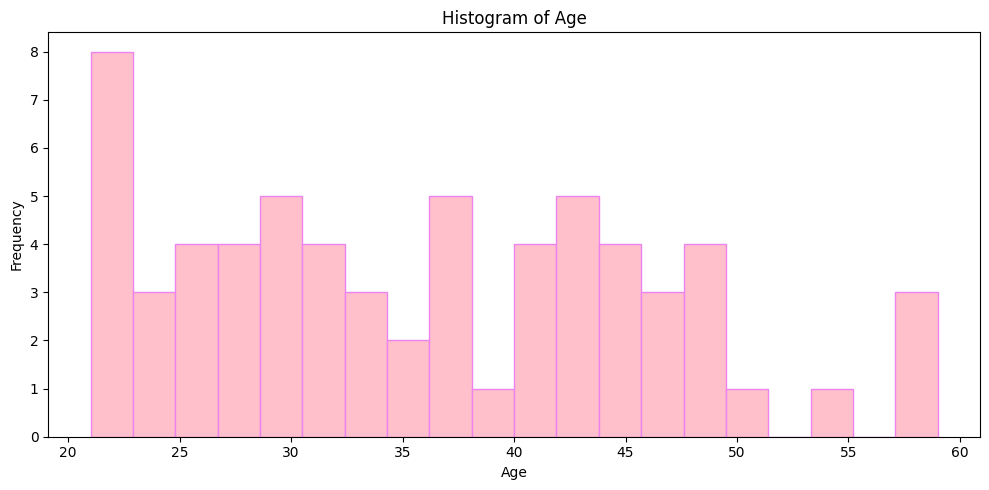

In [ ]:
uni_plot = UnivariatePlots(cleaned_df)

# Histogram with custom color and bins
uni_plot.plot_histogram("Age", bins=20, color="pink", edgecolor="violet", figsize=(10, 5))

### **Boxplot horizontal**

**This boxplot of Diastolic Blood Pressure illustrates the overall distribution, central tendency, and variability within the data.**
**The presence of outliers on the higher end indicates that some individuals may have unusually high diastolic pressure, which could be a sign of hypertension.**


Boxplot for 'DBP'


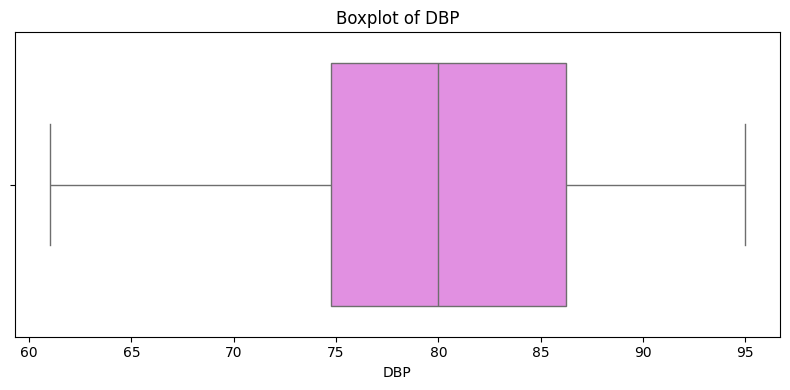

In [ ]:
# Boxplot horizontal
uni_plot.plot_boxplot("DBP", color="violet", figsize=(8, 4), orient='h')

### **KDE Plot with custom shade color**

**This KDE (Kernel Density Estimate) plot shows a smoothed version of the age distribution.**
**It helps us understand how age is distributed in the population, with most patients falling between the ages of 20 and 50.**


KDE Plot for 'Age'


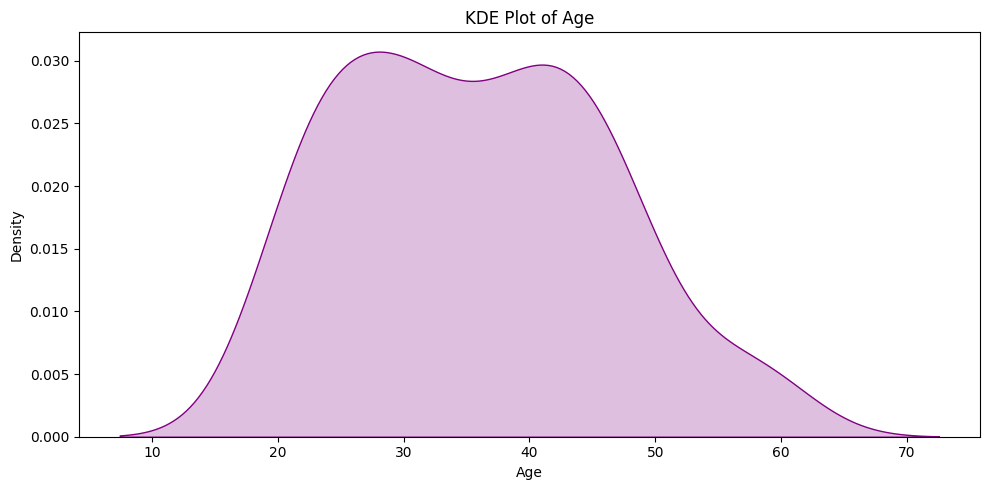

In [ ]:
# KDE Plot with custom shade color
uni_plot.plot_kde("Age", color="purple", shade=True, figsize=(10, 5))

### _**Class Distribution (Diastolic Blood pressure)**_

**The contour plot of Diastolic Blood Pressure highlights areas where values are densely clustered.**
**Regions with higher diastolic pressure suggest potential patterns of hypertension, making it easier to spot trends and at-risk groups within the data.**


Countplot for 'DBP'


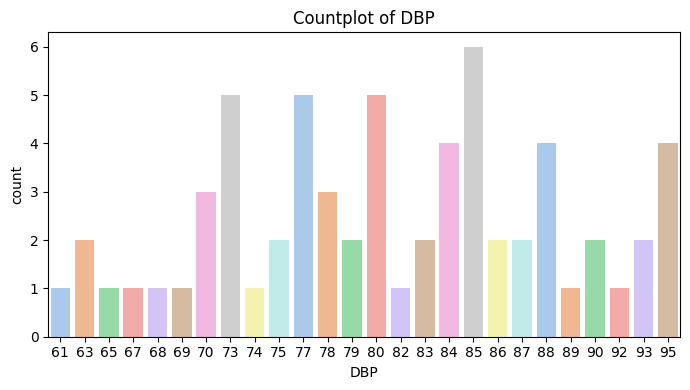

In [ ]:
# Countplot for Outcome (categorical)
uni_plot.plot_countplot("DBP", palette="pastel", figsize=(7, 4))

## **Bivariate Data Visualization**

These plots explore the **relationship between two features**.

### Plots Covered:
1. Scatter Plot - Numerical vs Numerical
2. Heatmap - Correlation matrix in visual form
3. Boxplot by Category - Spread across classes
4. Pairplot - Multiple pairwise scatterplots


In [ ]:
class BivariatePlots:
    def __init__(self, dataframe):
        self.df = dataframe.copy()

    def scatter_plot(self, col1, col2, hue='DO', palette='coolwarm', figsize=(8, 5)):
        print(f"\nScatter Plot: '{col1}' vs '{col2}'")
        plt.figure(figsize=figsize)
        sns.scatterplot(x=self.df[col1], y=self.df[col2], hue=self.df[hue], palette=palette)
        plt.title(f'Scatter Plot: {col1} vs {col2}')
        plt.tight_layout()
        plt.show()

    def correlation_heatmap(self, annot=True, cmap='DO', figsize=(10, 8)):
        print("\nCorrelation Heatmap")
        plt.figure(figsize=figsize)
        sns.heatmap(self.df.corr(), annot=annot, cmap=cmap, fmt=".2f", square=True)
        plt.title("Correlation Heatmap")
        plt.tight_layout()
        plt.show()
    def boxplot_by_category(self, numerical_col, category_col='DO', palette='pastel', figsize=(7, 5)):
        print(f"\nBoxplot: '{numerical_col}' grouped by '{category_col}'")
        plt.figure(figsize=figsize)
        sns.boxplot(
        x=self.df[category_col],
        y=self.df[numerical_col],
        hue=self.df[category_col],      
        palette=palette,
        legend=False
        )                    
        plt.title(f'Boxplot of {numerical_col} by {category_col}')
        plt.tight_layout()
        plt.show()
        
    def pairplot(self, columns=None, hue='DO', palette='husl'):
        print(f"\nPairplot of selected features")
        if columns:
            sns.pairplot(self.df[columns], hue=hue, palette=palette)
        else:
            sns.pairplot(self.df, hue=hue, palette=palette)
        plt.tight_layout()
        plt.show()


### **Custom scatter plot**

**This scatter plot illustrates the relationship between Diastolic and Systolic Blood Pressure.**
**Points are colored based on the DiseaseOutcome column.**
**Individuals with a positive outcome (DiseaseOutcome = 1) tend to have both higher diastolic and systolic pressures, forming a distinct cluster in the upper-right region**


Scatter Plot: 'DBP' vs 'SBP'


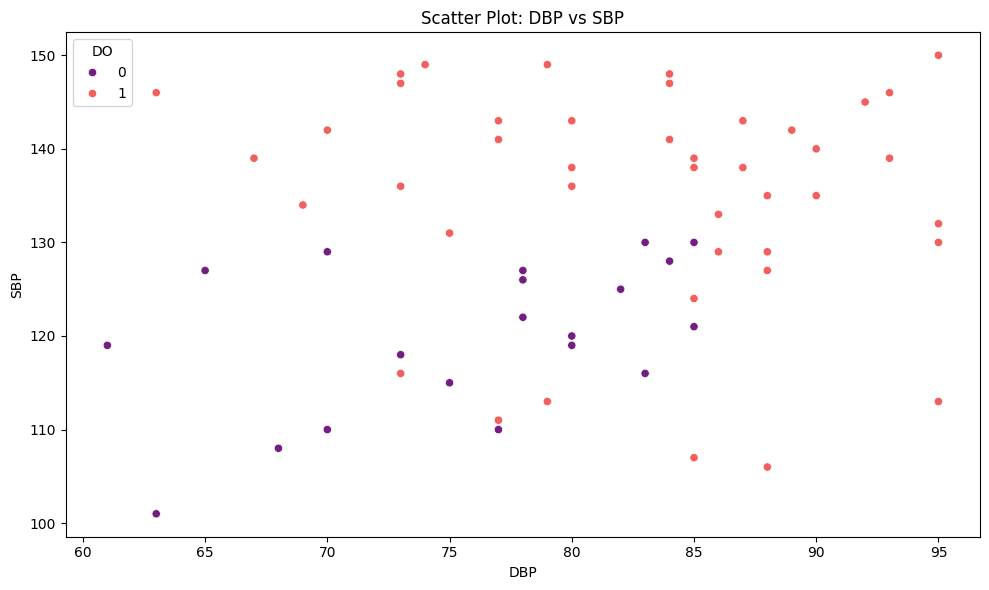

In [ ]:
bi_plot = BivariatePlots(cleaned_df)

bi_plot.scatter_plot('DBP', 'SBP', palette='magma', figsize=(10, 6))

### _**Correlation Matrix**_

**The heatmap reveals how different health indicators relate to each other.**
**Diastolic and Systolic Blood Pressure show a noticeable positive link, while most other variables have mild or weak associations.**
**This visualization helps pinpoint which factors might be more relevant to predicting DiseaseOutcome.**


Correlation Heatmap


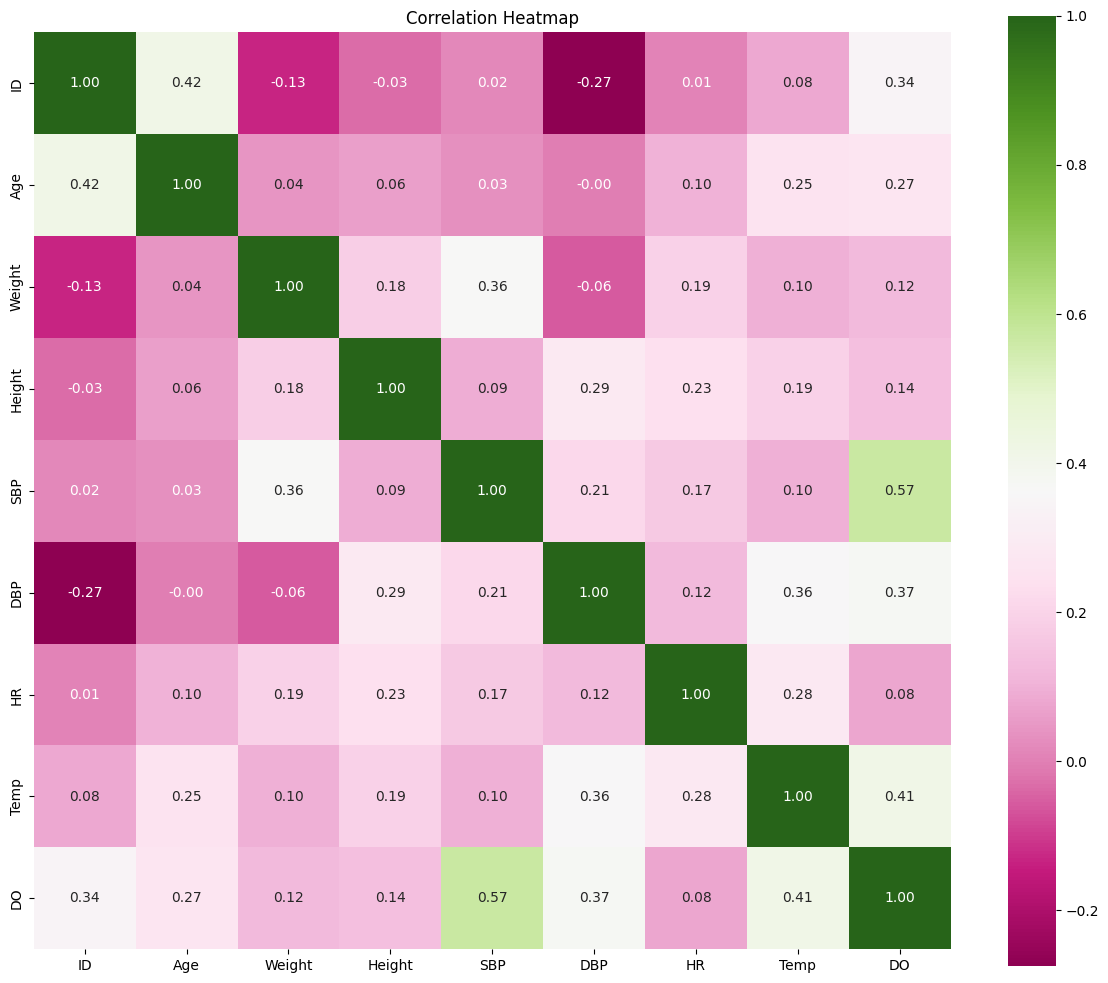

In [ ]:
bi_plot.correlation_heatmap(cmap='PiYG', figsize=(12, 10))

### **Age vs DiseaseOutcome**
**This boxplot shows that individuals with a positive DiseaseOutcome tend to be older on average.**
**This indicates that age may play a significant role in predicting health risks associated with elevated blood pressure or related conditions.**


Boxplot: 'Age' grouped by 'DO'


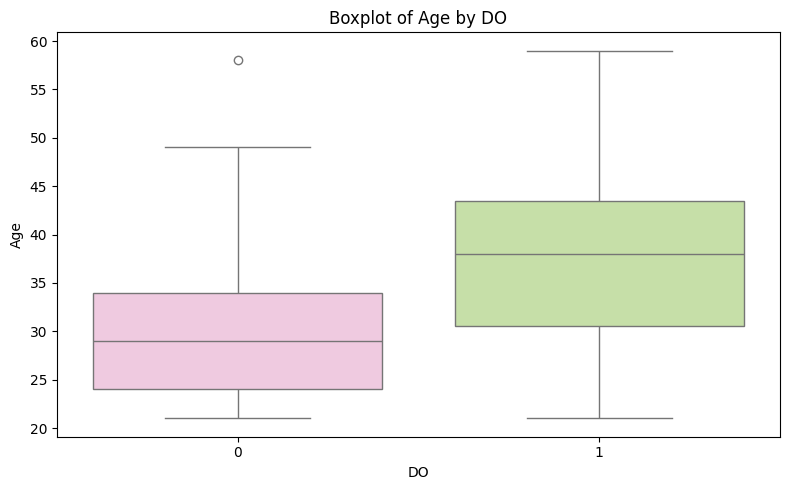

In [ ]:
# Boxplot with custom size and palette
bi_plot.boxplot_by_category("Age", palette="PiYG", figsize=(8, 5))


## **Machine Learning Workflow**

Now we move to training the model. This part includes:

1. **Splitting the Data**  
   - Train-test split using `sklearn.model_selection`

2. **Training the Model**  
   - We use `Logistic Regression` for binary classification (`Age` column)

3. **Evaluating the Model**  
   - Accuracy, Confusion Matrix, Classification Report

4. **Predicting with the Model**  
   - Using model to predict new or test data

Every block is wrapped in a separate class to keep things clean and modular.


In [ ]:
class DataSplitter:
    def __init__(self, dataframe, target_column):
        self.df = dataframe
        self.target = target_column

    def split_data(self, test_size=0.3, random_state=42):
        X = self.df.drop(self.target, axis=1)
        y = self.df[self.target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        return X_train, X_test, y_train, y_test

class ModelTrainer:
    def __init__(self):
        self.model = LogisticRegression(max_iter=1000)

    def train_model(self, X_train, y_train):
        self.model.fit(X_train, y_train)
class ModelEvaluator:
    def __init__(self, model, X_test, y_test):
        self.model = model
        self.X_test = X_test
        self.y_test = y_test
        self.predictions = self.model.predict(self.X_test)

    def show_prediction(self):
        return self.predictions
    
    def show_accuracy(self):
        print("\nAccuracy Score:")
        return accuracy_score(self.y_test, self.predictions)
    
    def show_confusion_matrix(self):
        print("\nConfusion Matrix:")
        return confusion_matrix(self.y_test, self.predictions)
    
    def show_classification_report(self):
        print("\nClassification Report:")
        return classification_report(self.y_test, self.predictions)


class Predictor:
    def __init__(self, model):
        self.model = model

    def predict(self, new_data):
        prediction = self.model.predict(new_data)
        return prediction


In [ ]:
# Splitting the data
splitter = DataSplitter(cleaned_df, target_column='DO')
X_train, X_test, y_train, y_test = splitter.split_data(test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test

(    ID  Age  Weight  Height  SBP  DBP  HR   Temp
 6    7   27    70.5   175.0  125   82  77   98.4
 33  34   35    64.0   167.4  132   95  78   99.6
 4    5   35    90.0   185.4  135   88  82   99.4
 47  48   22    64.7   178.9  141   84  83   98.3
 19  20   33    90.3   186.1  116   83  66   98.7
 54  55   40    55.0   189.5  106   88  75   97.8
 41  42   48    56.8   192.1  113   79  78   99.9
 55  56   58    94.7   174.0  143   77  77   99.8
 31  32   39    92.7   176.6  138   80  79   99.2
 30  31   21    94.1   166.7  149   79  84   99.8
 59  60   30    55.9   160.4  113   95  88   99.6
 60  61   43    76.0   188.3  116   73  74  100.7
 15  16   41    72.5   167.3  130   95  76  100.5
 27  28   47    55.3   164.9  138   85  78   98.4
 26  27   38    77.2   190.0  148   84  73   98.0
 24  25   43    85.5   164.9  124   85  88  100.4
 46  47   48    66.7   172.9  111   77  88  100.4
 11  12   33    73.5   174.3  133   86  81   99.2
 32  33   21    66.2   194.5  139   93  82   99.0


In [ ]:
# 2. Train the model
trainer = ModelTrainer()
trainer.train_model(X_train, y_train)

In [ ]:
# Evaluating the model
evaluator = ModelEvaluator(trainer.model, X_test, y_test)
evaluator

In [ ]:
# Show predictions
predictions = evaluator.show_prediction()
predictions


array([0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0])

In [ ]:
# Accuracy score
accuracy = evaluator.show_accuracy()
print(accuracy)



Accuracy Score:
0.9


In [ ]:

evaluator.show_classification_report()


Classification Report:


'              precision    recall  f1-score   support\n\n           0       1.00      0.78      0.88         9\n           1       0.85      1.00      0.92        11\n\n    accuracy                           0.90        20\n   macro avg       0.92      0.89      0.90        20\nweighted avg       0.92      0.90      0.90        20\n'

In [ ]:
# Confusion matrix
evaluator.show_confusion_matrix()



Confusion Matrix:


array([[ 7,  2],
       [ 0, 11]])

In [ ]:
# 4. Predict on new/test data (Optional)

predictor = Predictor(trainer.model)



In [ ]:

new_data = pd.DataFrame({ 
    'ID': [101],
    'Age': [45],
    'Weight': [70],
    'Height': [175],
    'SBP': [120],
    'DBP': [80],
    'HR': [75],
    'Temp': [36.5]})

# Prediction (0 = not sick , 1 = sick)
result = predictor.predict(new_data)
print("Predicted DiseaseOutcome:", "sick" if result[0] == 1 else "Not Sick")


Predicted DiseaseOutcome: Not Sick


## **Saving and Loading Trained Model with Pickle**

We use the `pickle` library to save the trained ML model into a `.pkl` file.
This allows us to reuse the model without retraining.

### Why Use Pickle?
- Avoids retraining
- Good for deployment
- Makes model portable

The `PickleHandler` class has methods to save and load the model.


In [ ]:
class PickleHandler:
    def __init__(self, filepath='people_data.pkl'):
        self.filepath = filepath

    def save_model(self, model):
        with open(self.filepath, 'wb') as file:
            pickle.dump(model, file)
        print(f"Model saved to '{self.filepath}' successfully.")

    def load_model(self):
        with open(self.filepath, 'rb') as file:
            model = pickle.load(file)
        print(f"Model loaded from '{self.filepath}' successfully.")
        return model


In [ ]:
# 1. After training the model
pickle_handler = PickleHandler()
pickle_handler.save_model('diabetes_model.pkl')

Model saved to 'people_data.pkl' successfully.
